In [1]:
#d = pd.read_table('ReflectXGasGiantRunReport.txt', delim_whitespace = True, names=['dir','result','notes'])
with open('ReflectXGasGiantRunReport-after-1st-base-run.txt','r') as f:
    d = f.read().splitlines()
    

direct = []
date = []
result = []
note = []
d[0].split(' ')
for i in range(len(d)):
    dd = d[i].split(' ')
    direct.append(dd[0])
    date.append(dd[1])
    result.append(dd[3])
    note.append(' '.join(dd[4:]))
    
df = pd.DataFrame({'dir':direct, 'date':date, 'result':result, 'note':note})
df

,dir,date,result,note
0,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-28-20:25:41,FAILED,division by zero
1,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-28-20:25:40,FAILED,division by zero
2,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-28-20:25:41,FAILED,division by zero
3,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-28-20:25:41,FAILED,division by zero
4,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-28-20:25:41,FAILED,division by zero
...,...,...,...,...
1253,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-30-6:55:28,converged,no error
1254,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-30-6:56:46,converged,no error
1255,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-30-6:56:53,converged,no error
1256,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-30-6:57:17,converged,no error


In [2]:
np.where(df['result']=='converged')[0].shape,np.where(df['result']=='FAILED')[0].shape

((897,), (361,))

In [3]:
np.where(df['result']=='FAILED')[0].shape[0]/len(df)

0.28696343402225755

In [4]:
np.where(df['note']=='division by zero ')[0].shape,np.where(df['note']=='division by zero ')[0].shape[0]/np.where(df['result']=='FAILED')[0].shape[0]



((179,), 0.49584487534626037)

In [5]:
df['dir'][0]

'/data2/lpearce/ReflectXGasGiantModelGrid/ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq34-sep3.0-rad0.35-mass0.05-mh100-co0.5-phase120'

In [6]:
divbyzero = np.where(df['note']=='division by zero ')[0]
divbyzero = df.loc[divbyzero]
divbyzero = divbyzero.reset_index(drop=True)

failedtoconverge = np.where(df['note']==' failed to converge ')
failedtoconverge = df.loc[failedtoconverge]
failedtoconverge = failedtoconverge.reset_index(drop=True)
failedtoconverge

pointsoffgrid = np.where(
    (df['result'] == 'FAILED') &
    (df['note']!='division by zero ') &
    (df['note']!=' failed to converge ')
                )[0]
pointsoffgrid = df.loc[pointsoffgrid]
pointsoffgrid = pointsoffgrid.reset_index(drop=True)
pointsoffgrid

,dir,date,result,note
0,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-28-20:41:12,FAILED,Many points in your profile went off the grid....
1,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-28-20:42:54,FAILED,Many points in your profile went off the grid....
2,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-28-20:47:40,FAILED,Many points in your profile went off the grid....
3,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-28-20:43:46,FAILED,Many points in your profile went off the grid....
4,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-28-20:53:32,FAILED,Many points in your profile went off the grid....
...,...,...,...,...
87,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-29-16:22:48,FAILED,Many points in your profile went off the grid....
88,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-29-16:24:27,FAILED,Many points in your profile went off the grid....
89,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-29-16:27:49,FAILED,Many points in your profile went off the grid....
90,/data2/lpearce/ReflectXGasGiantModelGrid/Refle...,2023-6-29-16:30:5,FAILED,Many points in your profile went off the grid....


## Divide by zero errors

In [5]:
for i in range(len(divbyzero)):
    print(divbyzero['dir'][i])

/data2/lpearce/ReflectXGasGiantModelGrid/ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq34-sep3.0-rad0.35-mass0.05-mh100-co0.5-phase120
/data2/lpearce/ReflectXGasGiantModelGrid/ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq34-sep3.0-rad0.35-mass0.05-mh100-co0.5-phase0
/data2/lpearce/ReflectXGasGiantModelGrid/ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq34-sep3.0-rad0.35-mass0.05-mh100-co0.5-phase90
/data2/lpearce/ReflectXGasGiantModelGrid/ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq34-sep3.0-rad0.35-mass0.05-mh100-co1.5-phase90
/data2/lpearce/ReflectXGasGiantModelGrid/ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq34-sep3.0-rad0.35-mass0.05-mh100-co1.5-phase0
/data2/lpearce/ReflectXGasGiantModelGrid/ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq34-sep3.0-rad0.35-mass0.05-mh100-co1.5-phase45
/data2/lpearce/ReflectXGasGiantModelGrid/ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq84-sep0.5-rad0.35-mass0.05-mh100-co0.5-p

/Volumes/Oy/picaso/reference/kcoeff_2020/sonora_2020_feh+200_co_050_noTiOVO.data.196
NOTE: You are loading Opacity tables without any Gaseous TiO and VO opacities
starting climate run
Iteration number  0 , min , max temp  85.01535515860908 738.135282643982 , flux balance  3.5240727949875703
Iteration number  1 , min , max temp  87.2567041334966 1052.6083950747022 , flux balance  3.071639930913468
Iteration number  2 , min , max temp  52.6 1322.5728237733454 , flux balance  2.8817518260167945
Iteration number  3 , min , max temp  52.6 1474.6035443966607 , flux balance  2.2193520493137653
Iteration number  4 , min , max temp  52.6 1560.3874089333285 , flux balance  0.33938801974432053
Iteration number  5 , min , max temp  52.6 1559.4949240263313 , flux balance  0.35014284988756506
Iteration number  6 , min , max temp  52.6 1559.4949221177346 , flux balance  0.35014287225541324
In t_start: Converged Solution in iterations  6
23  points went off the opacity grid. Correcting those.
Big iter

Iteration number  6 , min , max temp  52.6 5199.91243147353 , flux balance  0.001767016506480499
Iterations exceeded it_max ! sorry 
2  points went off the opacity grid. Correcting those.
Big iteration is  52.6 1
Iteration number  0 , min , max temp  52.6 5199.912447398602 , flux balance  0.058760052559070824
Iteration number  1 , min , max temp  52.6 5199.912586701309 , flux balance  0.014908371598854593
Iteration number  2 , min , max temp  52.6 5199.912910263066 , flux balance  0.007270950832421373
Iteration number  3 , min , max temp  52.6 5199.913274914968 , flux balance  0.0018620503346316619
Iteration number  4 , min , max temp  52.6 5199.913564460326 , flux balance  0.00012342204053070725
Iteration number  5 , min , max temp  59.42917518515104 5199.913837844546 , flux balance  -0.00029322988093679464
Iteration number  6 , min , max temp  60.16002822596296 5199.91410731212 , flux balance  -0.0004003714885559185
Iterations exceeded it_max ! sorry 
16  points went off the opacity 

Iteration number  7 , min , max temp  52.6 5199.973419479323 , flux balance  -0.007697178702998848
In t_start: Converged Solution in iterations  7
4  points went off the opacity grid. Correcting those.
Big iteration is  52.6 1
Iteration number  0 , min , max temp  52.6 5199.973708267486 , flux balance  0.009431707228079228
Iteration number  1 , min , max temp  52.6 5199.976872382823 , flux balance  -0.020482266552665194
Iteration number  2 , min , max temp  52.6 5199.977210511392 , flux balance  -0.019977024521595273
Iteration number  3 , min , max temp  52.6 5199.9805995750185 , flux balance  -0.018234720291114608
Iteration number  4 , min , max temp  52.6 5199.980600112171 , flux balance  -0.018234379419711587
In t_start: Converged Solution in iterations  4
3  points went off the opacity grid. Correcting those.
Big iteration is  52.6 2
Iteration number  0 , min , max temp  52.6 5199.980765286645 , flux balance  0.07642453184487676
Iteration number  1 , min , max temp  52.6 5199.98109

Iteration number  3 , min , max temp  67.93082123083434 5199.995847270426 , flux balance  -0.01013782279101231
Iteration number  4 , min , max temp  71.78753444609154 5199.998181784766 , flux balance  -0.013906873767656413
Iteration number  5 , min , max temp  71.78725249679542 5199.9982365222895 , flux balance  -0.014004140125514207
In t_start: Converged Solution in iterations  5
6  points went off the opacity grid. Correcting those.
Big iteration is  71.78725249679542 2
Iteration number  0 , min , max temp  55.174710239133105 5199.99825134789 , flux balance  0.16731409253938445
Iteration number  1 , min , max temp  52.6 5199.998442806294 , flux balance  0.15054111181374202
Iteration number  2 , min , max temp  52.6 5199.998540935596 , flux balance  0.14301988675206387
Iteration number  3 , min , max temp  52.6 5199.98971946894 , flux balance  0.03545269637417906
Iteration number  4 , min , max temp  53.01109711387236 5199.989739916083 , flux balance  0.03609624808502163
Iteration num

Iteration number  3 , min , max temp  74.74360014910414 5199.990903265738 , flux balance  -0.013255770250831276
Iteration number  4 , min , max temp  74.74304857100563 5199.991004710247 , flux balance  -0.013398808605591823
In t_start: Converged Solution in iterations  4
1  points went off the opacity grid. Correcting those.
Big iteration is  74.74304857100563 3
Iteration number  0 , min , max temp  52.6 5199.991761241899 , flux balance  0.06297559527283211
Iteration number  1 , min , max temp  52.6 5199.995369078486 , flux balance  0.013425362823501796
Iteration number  2 , min , max temp  52.6 5199.999132499562 , flux balance  -0.00951751307371419
Iteration number  3 , min , max temp  72.55261827302893 5199.999513720002 , flux balance  -0.010397458718390271
Iteration number  4 , min , max temp  70.93430576841014 5199.998400440719 , flux balance  -0.016694003261244626
Iteration number  5 , min , max temp  70.93327331601976 5199.99847540189 , flux balance  -0.016746180567257362
In t_st

Big iteration is  66.04114074009988 3
Iteration number  0 , min , max temp  52.6 5199.991396518952 , flux balance  0.03359882702401456
Iteration number  1 , min , max temp  52.6 5199.992499735392 , flux balance  0.019735273698796796
Iteration number  2 , min , max temp  73.03968703050802 5199.993361908988 , flux balance  0.011608787714968637
Iteration number  3 , min , max temp  73.68726512297188 5199.997216751109 , flux balance  -0.014102805632748877
Iteration number  4 , min , max temp  73.68882472577135 5199.997249130221 , flux balance  -0.01414048292872366
In t_start: Converged Solution in iterations  4
1  points went off the opacity grid. Correcting those.
Big iteration is  73.68882472577135 4
Not converged
[ 0 71 79 79 85 89]
Iteration number  0 , min , max temp  73.69949762772357 5199.997287141558 , flux balance  0.001603270472190133
Iteration number  1 , min , max temp  73.81095332695521 5199.9976831918375 , flux balance  -0.00024747513017109286
Iteration number  2 , min , max 

Iteration number  2 , min , max temp  73.62774351065441 5199.999289970864 , flux balance  0.025921883547453672
Iteration number  3 , min , max temp  73.99695737566616 5199.999737951385 , flux balance  0.00973775558712588
Iteration number  4 , min , max temp  74.50901409525473 5199.997914456054 , flux balance  -0.013722728042585777
Iteration number  5 , min , max temp  74.51801152392329 5199.99969431816 , flux balance  -0.017743684860378015
Iteration number  6 , min , max temp  74.51824774815681 5199.999798027332 , flux balance  -0.017783815573745775
In t_start: Converged Solution in iterations  6
1  points went off the opacity grid. Correcting those.
Big iteration is  74.51824774815681 0
Iteration number  0 , min , max temp  63.41434330160148 5199.971459761226 , flux balance  0.012384984500134385
Iteration number  1 , min , max temp  74.14302395145322 5199.973571685337 , flux balance  -0.012735687206029949
Iteration number  2 , min , max temp  74.14526793675543 5199.973615435459 , flux

Iteration number  4 , min , max temp  73.9780957544893 5199.999241250922 , flux balance  -0.011232407496335174
In t_start: Converged Solution in iterations  4
1  points went off the opacity grid. Correcting those.
Big iteration is  73.9780957544893 2
Iteration number  0 , min , max temp  52.6 5199.993787998577 , flux balance  0.05829005182315805
Iteration number  1 , min , max temp  69.65466765880792 5199.995573556791 , flux balance  0.0045290807056394804
Iteration number  2 , min , max temp  67.93817435436779 5199.997432902633 , flux balance  -0.014383436661900329
Iteration number  3 , min , max temp  67.93405515652196 5199.997470540605 , flux balance  -0.014462760063335888
In t_start: Converged Solution in iterations  3
9  points went off the opacity grid. Correcting those.
Big iteration is  67.93405515652196 3
Iteration number  0 , min , max temp  71.44553078450242 5199.997478062907 , flux balance  0.11733588161475993
Iteration number  1 , min , max temp  68.1970367596115 5199.99764

Iteration number  0 , min , max temp  69.84627602532824 5199.993118747661 , flux balance  0.025501486027917648
Iteration number  1 , min , max temp  73.37562748698011 5199.993142218122 , flux balance  0.0239337412520875
Iteration number  2 , min , max temp  74.20109973273631 5199.993375171843 , flux balance  0.005206940788292934
Iteration number  3 , min , max temp  75.0407290440654 5199.993845282975 , flux balance  -0.01781758391581205
Iteration number  4 , min , max temp  75.04066401444994 5199.993860926453 , flux balance  -0.017856397856172802
In t_start: Converged Solution in iterations  4
Big iteration is  75.04066401444994 4
Not converged
[ 0 70 89  0 85 89]
Iteration number  0 , min , max temp  68.57201832836375 5199.994224308157 , flux balance  0.12474484116085217
Iteration number  1 , min , max temp  72.49705444794965 5199.994648337302 , flux balance  -0.00645561233153272
Iteration number  2 , min , max temp  72.56992521789567 5199.99489221348 , flux balance  -0.01109405804505

Iteration number  0 , min , max temp  63.495989501648815 5199.9957172279255 , flux balance  0.02269671155366109
Iteration number  1 , min , max temp  63.69758749669209 5199.995749019579 , flux balance  0.027172874260850684
Iteration number  2 , min , max temp  65.50959057007789 5199.9960668875765 , flux balance  -0.007240107006285331
Iteration number  3 , min , max temp  65.50845927569671 5199.996079679531 , flux balance  -0.00747446147688458
In t_start: Converged Solution in iterations  3
1  points went off the opacity grid. Correcting those.
Big iteration is  65.50845927569671 3
Iteration number  0 , min , max temp  54.0553912838621 5199.996244814736 , flux balance  0.06747812719276056
Iteration number  1 , min , max temp  62.89895640867523 5199.99651489019 , flux balance  0.004842272957972981
Iteration number  2 , min , max temp  63.27149144964935 5199.996800992581 , flux balance  -0.009932226086188491
Iteration number  3 , min , max temp  63.271254405498986 5199.996817824344 , flux

Iteration number  0 , min , max temp  62.072995342198475 5199.996838045017 , flux balance  0.02372591962680909
Iteration number  1 , min , max temp  62.36150307509566 5199.996898187217 , flux balance  0.02640773582683299
Iteration number  2 , min , max temp  64.95099458099823 5199.997499667632 , flux balance  -0.006947912843310728
Iteration number  3 , min , max temp  64.94834682828267 5199.997523619846 , flux balance  -0.007172333628731727
In t_start: Converged Solution in iterations  3
1  points went off the opacity grid. Correcting those.
Big iteration is  64.94834682828267 2
Iteration number  0 , min , max temp  54.00827937496157 5199.997843248822 , flux balance  0.0628602672930229
Iteration number  1 , min , max temp  61.6217651725423 5199.998341602145 , flux balance  0.004571192612553746
Iteration number  2 , min , max temp  62.12946965800695 5199.998865891699 , flux balance  -0.009569789831238034
Iteration number  3 , min , max temp  62.13034666489079 5199.998897091493 , flux ba

Iteration number  0 , min , max temp  62.747128355732464 5199.997214172124 , flux balance  0.021307260851644066
Iteration number  1 , min , max temp  63.001199511205215 5199.997409370295 , flux balance  0.023976144682819625
Iteration number  2 , min , max temp  65.2866999884677 5199.999358686101 , flux balance  -0.007096356180392158
Iteration number  3 , min , max temp  65.28471111995023 5199.999439941279 , flux balance  -0.007325201012594881
In t_start: Converged Solution in iterations  3
1  points went off the opacity grid. Correcting those.
Big iteration is  65.28471111995023 1
Iteration number  0 , min , max temp  54.94861291608139 5199.993756940744 , flux balance  0.060354314443659365
Iteration number  1 , min , max temp  62.25172891746347 5199.994810499616 , flux balance  0.004092778304343442
Iteration number  2 , min , max temp  62.77670654346968 5199.995943340854 , flux balance  -0.009603086033574751
Iteration number  3 , min , max temp  62.77836600993649 5199.996011864644 , fl

'ReflectXGasGiantModelGrid-Neptune-Tstar3000-Rstar0.2-Teq34-sep3.0-rad0.35-mass0.05-mh100-co0.5-phase120'

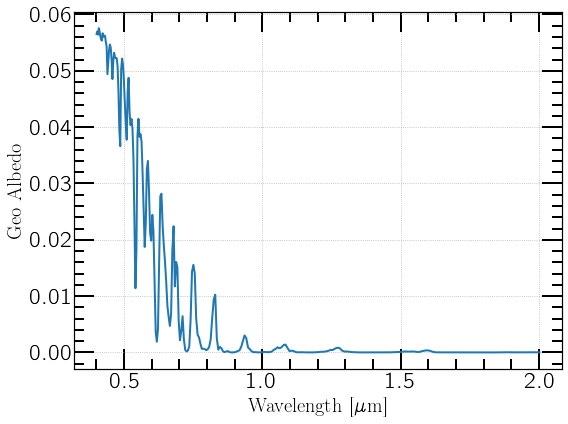

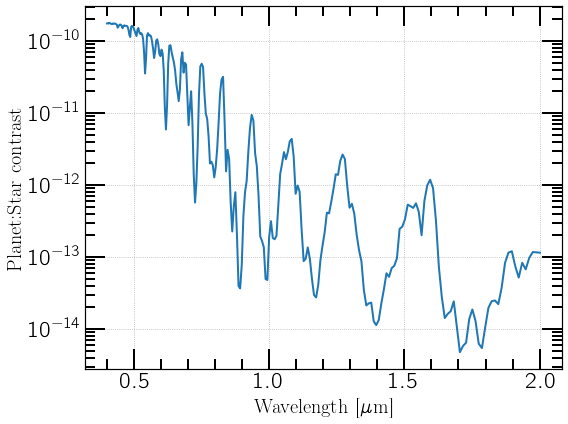

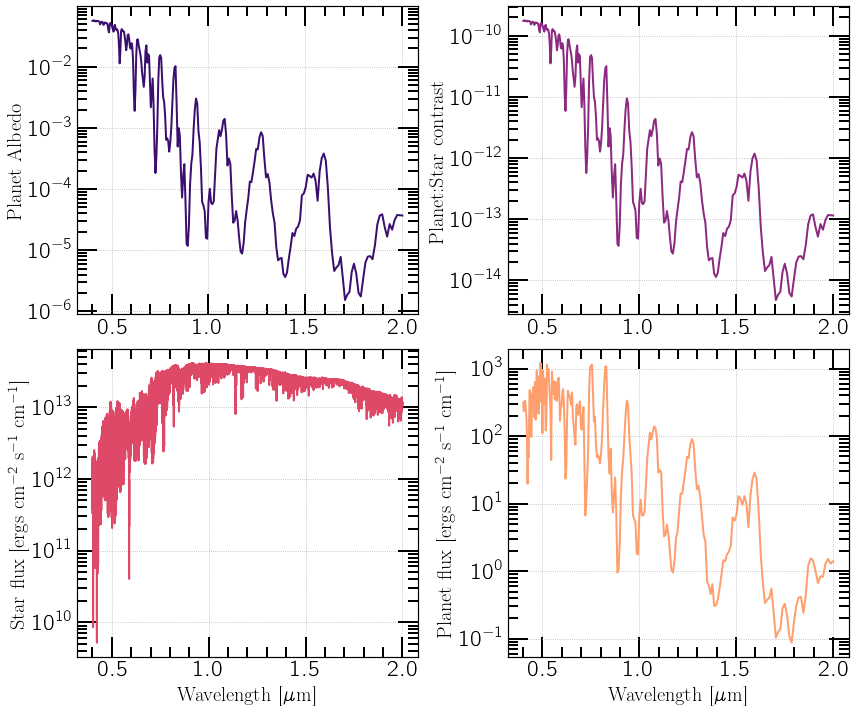

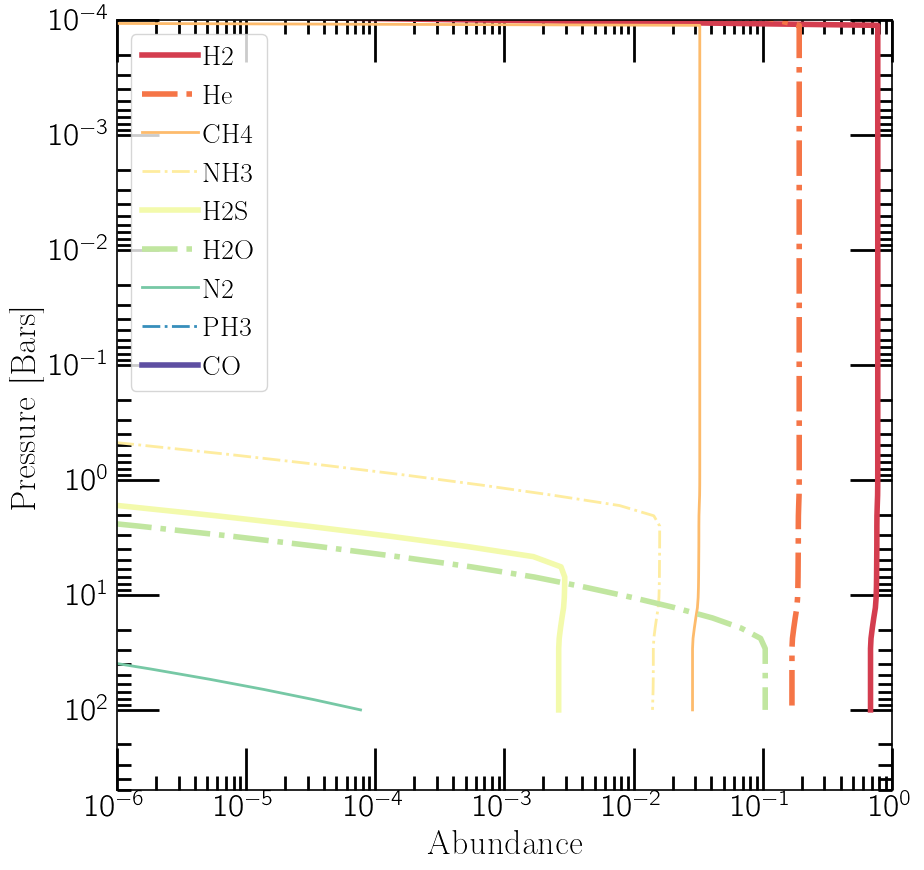

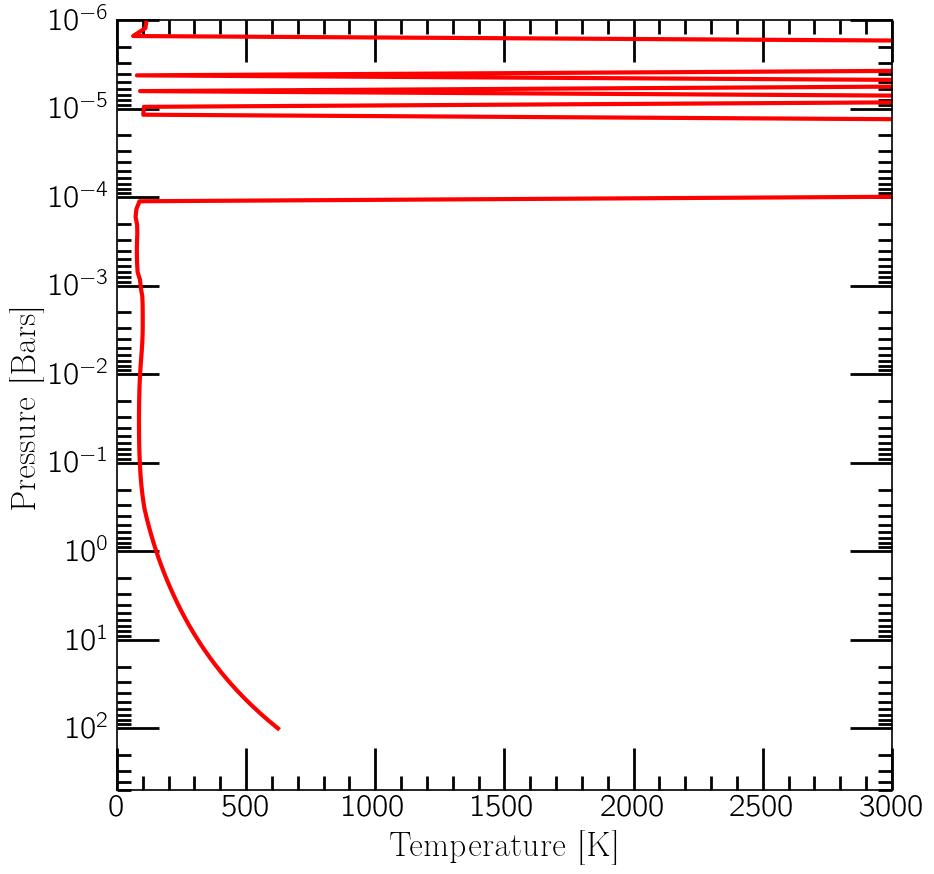

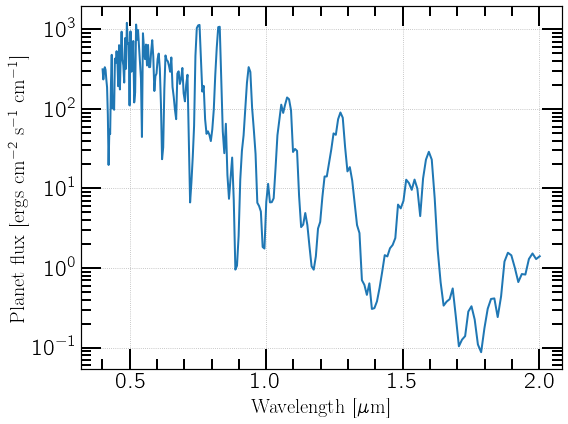

In [1]:
import numpy as np
#from tools.tools import *
from myastrotools.reflectx import *
import astropy.units as u
import pandas as pandas

def Run1Model(p, num_tangle = 6, num_gangle = 6):

    grid = p['name']
    ## Planet:
    planettype = p['planet_type']
    Tint = p['tint'] # Internal Temperature of your Planet in K
    Teq = ComputeTeq(p['st_teff'], p['rstar']*u.Rsun, p['au']*u.au, 
                     Ab = 0.3, fprime = 1/4) # planet equilibrium temperature 
    radius = p['pl_rad'] #Rjup
    massj = p['pl_mass']
    semi_major = p['au']
    phase = p['phase']

    ## Star:
    T_star = p['st_teff'] # K, star effective temperature
    logg = p['logg'] #logg , cgs
    metal = p['feh'] # metallicity of star
    r_star = p['rstar'] # solar radius


    ## Climate:
    nlevel = int(p['nlevel']) # number of plane-parallel levels in your code
    nofczns = int(p['nofczns']) # number of convective zones initially. Let's not play with this for now.
    nstr_upper = int(p['nstr_upper']) # top most level of guessed convective zone
    nstr_deep = nlevel -2 # this is always the case. Dont change this
    nstr = np.array([0,nstr_upper,nstr_deep,0,0,0]) # initial guess of convective zones
    rfacv = p['rfacv']

    ## Opacities:
    #
    planet_mh = p['mh']
    planet_mh_CtoO = p['cto']

    Teq_str = np.round(Teq, decimals=0)
    directory = f'{grid}-{planettype}-Tstar{int(T_star)}-Rstar{r_star}-Teq{int(Teq_str)}-sep{semi_major}-rad{radius}-mass{massj}-mh{int(planet_mh)}-co{planet_mh_CtoO}-phase{int(phase)}'
    #savefiledirectory = p['output_dir']+directory
    output_dir = ''
    savefiledirectory = output_dir+directory

    local_ck_path = f'/Volumes/Oy/picaso/reference/kcoeff_2020/'
    #local_ck_path = p['local_ck_path']

    planet_properties = {
        'tint':Tint, 'Teq':Teq, 'radius':radius, 'radius_unit':u.Rjup,
         'mass':massj, 'mass_unit': u.Mjup,
         'gravity': None, 'gravity_unit':None,
        'semi_major':semi_major, 'semi_major_unit': u.AU,
        'mh': planet_mh, 'CtoO':planet_mh_CtoO, 'phase':phase, 'num_tangle':num_tangle,
        'num_gangle':num_gangle, 'noTiOVO':p['noTiOVO'], 'planet_mh_str':p['mh_str'],
        'local_ck_path':local_ck_path
    }

    star_properties = {
        'Teff':T_star, 'logg':logg, 'mh':metal, 'radius':r_star
    }

    climate_run_setup = {'climate_pbottom':int(p['p_bottom']),
            'climate_ptop':int(p['p_top']),
            'nlevel':nlevel, 'nofczns':nofczns, 'nstr_upper':nstr_upper,
            'nstr_deep':nstr_deep, 'rfacv':rfacv
    }
    #opa_file = p['opa_file']
    opa_file = None
    wave_range = [float(p['wave_range'].split(',')[0].replace('[','')),
              float(p['wave_range'].split(',')[1].replace(' ','').replace(']',''))]
    spectrum_setup = {'opacity_db':opa_file,
                      'wave_range':wave_range,
                      'calculation':'reflected', 'R':150
                     }

    if p['guess'] == 'guillot':
        use_guillotpt = True


    cj = MakeModelCloudFreePlanet(planet_properties, 
                            star_properties,
                            use_guillotpt = True,
                            cdict = climate_run_setup,
                            compute_spectrum = True,
                            specdict = spectrum_setup,
                            savefiledirectory = savefiledirectory
                 )
#     import time
#     with open(savefiledirectory+'/terminal_output.txt','r') as f:
#         z = f.read()
#         k = open('ReflectXGasGiantRunReport.txt','a')
#         t = time.localtime()
#         outtime = str(t.tm_year)+'-'+str(t.tm_mon)+'-'+str(t.tm_mday)+'-'+str(t.tm_hour)+':'+str(t.tm_min)+':'+str(t.tm_sec)
#         if 'YAY ! ENDING WITH CONVERGENCE' in z:
#             k.write(savefiledirectory + ' ' +outtime + '  converged \n')
#         else:
#             k.write(savefiledirectory + ' ' +outtime + '  FAILED \n')
#         k.close()
        
    return savefiledirectory#, cj

def GetP(sheet_id='11u2eirdZcWZdjnKFn3vzqbCtKCodstP-KnoGXC5FdR8', 
             sheet_name='GasGiantsBaseModels'):
    url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&gid={sheet_name}"
    p = pd.read_csv(url)
    p = p.dropna(axis=1, how='all')
    for i in range(len(p)):
        try:
            if np.isnan(p[p.columns[0]][0]):
                p = p.drop(i, axis=0)
        except TypeError:
            pass
    return p

def GetDirectoryLocInP(p, directory):
    T = directory.split('-')
    planettype = T[1]
    Tstar = np.int64(T[2][5:])
    Rstar = np.float64(T[3][5:])
    sep = np.float64(T[5][3:])
    cto = np.float64(T[9][2:])
    phase = np.int64(T[10][5:])
    loc = np.where(
        (p['planet_type'] == planettype) &
        (p['st_teff'] == Tstar) & 
        (p['rstar'] == Rstar) &
        (p['au'] == sep) &
        (p['cto'] == cto) &
        (p['phase'] == phase)
    )[0]
    return loc[0]


#### A divide by zero error model:
directory = 'ReflectXGasGiantModelGrid-SuperJup-Tstar7000-Rstar1.7-Teq127-sep10.0-rad0.9-mass5.0-mh1-co1.5-phase90'



p = GetP()
loc = GetDirectoryLocInP(p, directory)
#pp = p.loc[loc]
pp = p.loc[36]
Run1Model(pp)